In [9]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import sys
sys.path.append("../../../")

import numpy as np
SPEED_LIMIT = np.pi/2

In [10]:
#test expected cost of fsim
#sweep parameters of fSim gate with t=1 to see how expected haar changes
#notice that the 8.59 is the worst, but also is very close to SWAP
from src.utils.custom_gates import SYC, FSim
from src.utils.custom_gates import CustomCostGate
from src.utils.polytope_wrap import gate_set_to_haar_expectation

data = []
labels = []
n_theta = 6
n_phi = 6
for i in range(1,n_theta+1):
    temp_data = []
    temp_labels = []
    for j in range(1,n_phi+1):
            
        temp_labels.append((f"theta={i}pi/{n_theta}", f"phi={j}pi/{n_phi}"))
        logging.info(temp_labels[-1])

        # if i < j: #we might use this depending on whether the results are symmetric
        #     temp_data.append(0)
        #     continue

        cost = sum([i*np.pi/n_theta, j*np.pi/n_phi])/SPEED_LIMIT
        u = FSim(theta=i*np.pi/n_theta, phi=j*np.pi/n_phi).to_matrix()
        u = CustomCostGate(u, f"fSim({i*np.pi/n_theta, j*np.pi/n_phi})", cost=1)

        result = gate_set_to_haar_expectation(u, chatty=False)
        temp_data.append(result)
        
    labels.append(temp_labels)
    data.append(temp_data) 

INFO:root:('theta=1pi/6', 'phi=1pi/6')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.263533584618538
INFO:root:('theta=1pi/6', 'phi=2pi/6')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 4.441917398633472
INFO:root:('theta=1pi/6', 'phi=3pi/6')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.0923351827359733
INFO:root:('theta=1pi/6', 'phi=4pi/6')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.503872946744405
INFO:root:('theta=1pi/6', 'phi=5pi/6')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 2.10702995951045
INFO:root:('theta=2pi/6', 'phi=1pi/6')
INFO:root:==== Workin

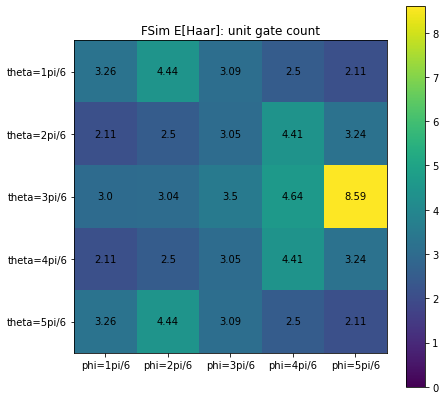

In [11]:
from src.utils.visualize import plotHamiltonianSweep
plotHamiltonianSweep(np.matrix(data), title="FSim E[Haar]: unit gate count", labels=labels, vmax=np.amax(data));